In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
%matplotlib inline

In [80]:
cab_data_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
customerID_df = pd.read_csv("Customer_ID.csv")
transactionID_df = pd.read_csv("Transaction_ID.csv")

In [81]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [82]:
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63
1,10000029,1/2/2016,Pink Cab,BOSTON MA,21.34,324.21,226.20
2,10000030,1/2/2016,Pink Cab,BOSTON MA,41.30,646.06,454.30
3,10000041,1/2/2016,Pink Cab,CHICAGO IL,35.02,598.43,406.23
4,10000045,1/2/2016,Pink Cab,CHICAGO IL,3.24,48.04,33.70


In [83]:
import datetime as dt
cab_data_df['Date of Travel'] = pd.to_datetime(cab_data_df['Date of Travel'])

In [84]:
cab_data_df['Date of Travel'].min()

Timestamp('2016-01-02 00:00:00')

In [85]:
cab_data_df['Date of Travel'].max()

Timestamp('2018-12-31 00:00:00')

In [86]:
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70


In [87]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [88]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [89]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [90]:
city_df['Population'] = city_df['Population'].apply(lambda x: x.replace(",", ""))
city_df['Users'] = city_df['Users'].apply(lambda x: x.replace(",", ""))

In [91]:
city_df['Population'] = city_df['Population'].astype("int")
city_df['Users'] = city_df['Users'].astype("int")

In [92]:
city_df

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [93]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [94]:
cab_data_df[cab_data_df['City']=='SAN FRANCISCO CA']

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [95]:
customerID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [96]:
customerID_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [97]:
transactionID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [98]:
transactionID_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Revenue generated by each company for all three years

In [99]:
cab_data_df['Year'] = cab_data_df['Date of Travel'].dt.year

In [100]:
totalrevenue_allyears = cab_data_df[['Company','Price Charged','Cost of Trip','Year']]
totalrevenue_allyears.head()

,Company,Price Charged,Cost of Trip,Year
0,Pink Cab,125.20,97.63,2016
1,Pink Cab,324.21,226.20,2016
2,Pink Cab,646.06,454.30,2016
3,Pink Cab,598.43,406.23,2016
4,Pink Cab,48.04,33.70,2016


In [101]:
totalrevenue_allyears_grpby = totalrevenue_allyears.groupby(['Company','Year']).agg(Revenue = pd.NamedAgg(column ='Price Charged', 
                                                                                                          aggfunc= 'sum'), Investments = pd.NamedAgg(column=
                                                                                                                                                     'Cost of Trip',aggfunc='sum'))
totalrevenue_allyears_grpby

Revenue  Investments
Company    Year                         
Pink Cab   2016  7908479.23   6194968.01
           2017  9578629.54   7544974.63
           2018  8841142.56   7280980.37
Yellow Cab 2016 38481133.18  24554137.75
           2017 45818910.04  29242932.07
           2018 41553843.97  28036444.20

In [102]:
totalrevenue_allyears_grpby = totalrevenue_allyears_grpby.reset_index()

Text(0, 0.5, 'Revenue * 10^7')

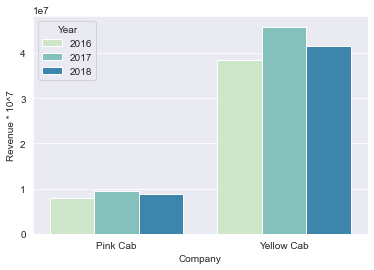

In [103]:
sns.set_style('darkgrid')
sns.barplot(x='Company',y='Revenue',data=totalrevenue_allyears_grpby, hue='Year' ,palette='GnBu')
plt.ylabel("Revenue * 10^7")

### Profit percentage of each company for all years

In [104]:
totalrevenue_allyears_grpby['profit_percentage'] = ((totalrevenue_allyears_grpby['Revenue'] - 
                                                    totalrevenue_allyears_grpby['Investments']) / totalrevenue_allyears_grpby['Investments']) * 100

In [105]:
totalrevenue_allyears_grpby

,Company,Year,Revenue,Investments,profit_percentage
0,Pink Cab,2016,7908479.23,6194968.01,27.66
1,Pink Cab,2017,9578629.54,7544974.63,26.95
2,Pink Cab,2018,8841142.56,7280980.37,21.43
3,Yellow Cab,2016,38481133.18,24554137.75,56.72
4,Yellow Cab,2017,45818910.04,29242932.07,56.68
5,Yellow Cab,2018,41553843.97,28036444.20,48.21


<AxesSubplot:xlabel='Company', ylabel='profit_percentage'>

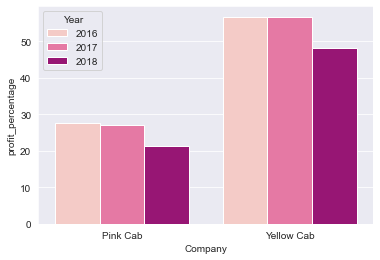

In [106]:
sns.barplot(x= totalrevenue_allyears_grpby['Company'],y =totalrevenue_allyears_grpby['profit_percentage'], hue=
            totalrevenue_allyears_grpby['Year'], palette='RdPu')


### How is the profit percentage varying for kilometers/distances travelled for each company? Is there any effect?

In [107]:
cab_data_df['KM Travelled'].min()

1.9

In [108]:
cab_data_df['KM Travelled'].max()

48.0

In [109]:
cab_data_df['profit_percentage'] = ((cab_data_df['Price Charged'] - cab_data_df['Cost of Trip'])/cab_data_df['Cost of Trip'])*100

In [110]:
cab_data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,28.24
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,2016,43.33
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,2016,42.21
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,2016,47.31
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,2016,42.57


In [111]:
km_profit = cab_data_df.groupby(['Company','KM Travelled'])['profit_percentage'].mean().reset_index()
pink_km_profit = km_profit.where(km_profit['Company']=='Pink Cab')
yellow_km_profit = km_profit.where(km_profit['Company']=='Yellow Cab')

In [112]:
pink_km_profit.dropna(inplace=True)
pink_km_profit

,Company,KM Travelled,profit_percentage
0,Pink Cab,1.90,26.90
1,Pink Cab,1.92,28.29
2,Pink Cab,1.94,25.37
3,Pink Cab,1.96,23.35
4,Pink Cab,1.98,22.17
...,...,...,...
869,Pink Cab,46.41,27.00
870,Pink Cab,46.80,27.49
871,Pink Cab,47.20,23.96
872,Pink Cab,47.60,25.30


In [113]:
pink_km_profit_vis = py.line(x='KM Travelled',y='profit_percentage',data_frame=pink_km_profit)
pink_km_profit_vis.show()

In [114]:
yellow_km_profit.dropna(inplace=True)
yellow_km_profit

,Company,KM Travelled,profit_percentage
874,Yellow Cab,1.90,54.86
875,Yellow Cab,1.92,49.23
876,Yellow Cab,1.94,58.52
877,Yellow Cab,1.96,56.07
878,Yellow Cab,1.98,60.23
...,...,...,...
1743,Yellow Cab,46.41,49.52
1744,Yellow Cab,46.80,52.15
1745,Yellow Cab,47.20,57.38
1746,Yellow Cab,47.60,53.10


In [115]:
yellow_km_profit_vis = py.line(x='KM Travelled',y='profit_percentage',data_frame=yellow_km_profit)
yellow_km_profit_vis.show()

### The total km's travelled/covered by each company across each city

In [116]:
city_km_profit_grpby = cab_data_df.groupby(['Company','City']).agg(total_kmtravelled=pd.NamedAgg(column='KM Travelled',aggfunc='sum')).reset_index()
city_km_profit_grpby

,Company,City,total_kmtravelled
0,Pink Cab,ATLANTA GA,39715.17
1,Pink Cab,AUSTIN TX,41038.42
2,Pink Cab,BOSTON MA,117933.51
3,Pink Cab,CHICAGO IL,210726.13
4,Pink Cab,DALLAS TX,30389.26
5,Pink Cab,DENVER CO,31308.15
6,Pink Cab,LOS ANGELES CA,449656.77
7,Pink Cab,MIAMI FL,44644.45
8,Pink Cab,NASHVILLE TN,41474.17
9,Pink Cab,NEW YORK NY,315967.27


Text(0, 0.5, "total KM's travelled(in millions)")

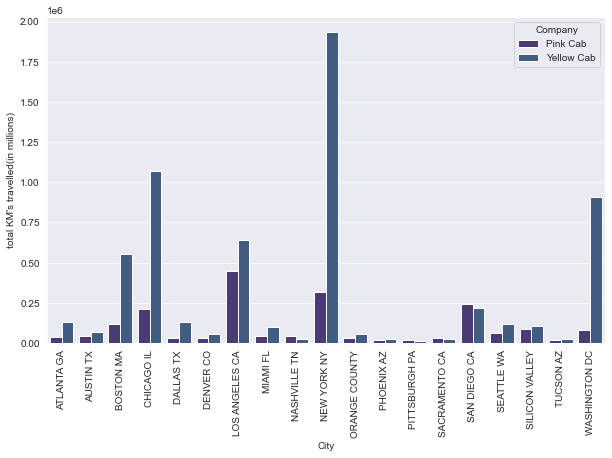

In [117]:
sns.set_palette("viridis")
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='total_kmtravelled',data=city_km_profit_grpby,hue='Company')
plt.xticks(rotation=90)
plt.ylabel("total KM's travelled(in millions)")

### Profit distribution of each company across all cities

In [118]:
cabdata_profit = cab_data_df[cab_data_df['profit_percentage'] > 0]
cabdata_profit

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,28.24
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,2016,43.33
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,2016,42.21
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,2016,47.31
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,2016,42.57
...,...,...,...,...,...,...,...,...,...
359387,10439960,2018-12-31,Yellow Cab,WASHINGTON DC,33.93,474.47,411.23,2018,15.38
359388,10439984,2018-12-31,Yellow Cab,WASHINGTON DC,40.00,641.78,484.80,2018,32.38
359389,10440028,2018-12-31,Yellow Cab,WASHINGTON DC,26.22,405.25,327.23,2018,23.84
359390,10440034,2018-12-31,Yellow Cab,WASHINGTON DC,34.68,505.38,470.26,2018,7.47


In [119]:
profit_dist = cabdata_profit.groupby(['Company','City',"Year"]).agg({"profit_percentage":"mean"}).reset_index()
profit_dist

,Company,City,Year,profit_percentage
0,Pink Cab,ATLANTA GA,2016,34.37
1,Pink Cab,ATLANTA GA,2017,28.84
2,Pink Cab,ATLANTA GA,2018,21.58
3,Pink Cab,AUSTIN TX,2016,38.36
4,Pink Cab,AUSTIN TX,2017,39.50
...,...,...,...,...
109,Yellow Cab,TUCSON AZ,2017,33.68
110,Yellow Cab,TUCSON AZ,2018,25.78
111,Yellow Cab,WASHINGTON DC,2016,30.38
112,Yellow Cab,WASHINGTON DC,2017,35.36


In [120]:
profit_dist_pink = profit_dist.where(profit_dist['Company']=='Pink Cab')
profit_dist_yellow = profit_dist.where(profit_dist['Company']=='Yellow Cab')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

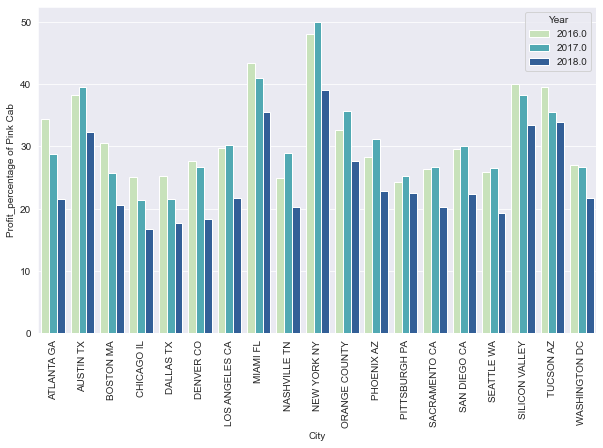

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='profit_percentage',data=profit_dist_pink,hue='Year',palette='YlGnBu')
plt.ylabel("Profit_percentage of Pink Cab")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

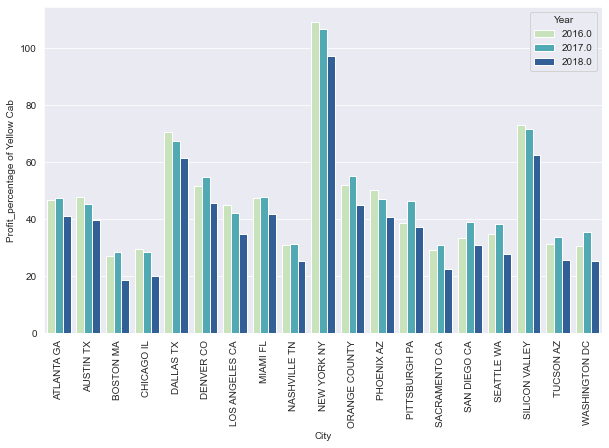

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='profit_percentage',data=profit_dist_yellow,hue='Year',palette='YlGnBu')
plt.ylabel("Profit_percentage of Yellow Cab")
plt.xticks(rotation=90)

### Loss distribution of each company across all cities

In [123]:
cabdata_loss = cab_data_df[cab_data_df['profit_percentage'] <= 0]
cabdata_loss.rename(columns={"profit_percentage":"loss_percentage"}, inplace=True)
cabdata_loss

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,loss_percentage
10,10000066,2016-01-02,Pink Cab,DALLAS TX,13.13,122.42,149.68,2016,-18.21
11,10000067,2016-01-02,Pink Cab,DALLAS TX,33.32,308.58,386.51,2016,-20.16
12,10000070,2016-01-02,Pink Cab,DENVER CO,7.02,61.30,82.84,2016,-26.00
34,10000356,2016-01-02,Pink Cab,SEATTLE WA,14.95,171.47,171.93,2016,-0.26
389,10000378,2016-01-05,Pink Cab,WASHINGTON DC,29.75,295.60,348.07,2016,-15.08
...,...,...,...,...,...,...,...,...,...
359335,10438112,2018-12-31,Yellow Cab,CHICAGO IL,22.42,269.98,282.49,2018,-4.43
359336,10438116,2018-12-31,Yellow Cab,CHICAGO IL,36.58,435.76,487.25,2018,-10.57
359338,10438152,2018-12-31,Yellow Cab,CHICAGO IL,19.62,233.72,242.50,2018,-3.62
359340,10438192,2018-12-31,Yellow Cab,CHICAGO IL,38.61,469.94,509.65,2018,-7.79


In [124]:
loss_dist = cabdata_loss.groupby(['Company','City',"Year"]).agg({"loss_percentage":"mean"}).reset_index()
loss_dist

,Company,City,Year,loss_percentage
0,Pink Cab,ATLANTA GA,2016,-8.88
1,Pink Cab,ATLANTA GA,2017,-8.58
2,Pink Cab,ATLANTA GA,2018,-5.65
3,Pink Cab,AUSTIN TX,2016,-9.00
4,Pink Cab,AUSTIN TX,2017,-7.38
...,...,...,...,...
101,Yellow Cab,TUCSON AZ,2017,-8.94
102,Yellow Cab,TUCSON AZ,2018,-6.36
103,Yellow Cab,WASHINGTON DC,2016,-6.08
104,Yellow Cab,WASHINGTON DC,2017,-4.94


In [125]:
loss_dist_pink = loss_dist.where(loss_dist['Company']=='Pink Cab')
loss_dist_yellow = loss_dist.where(loss_dist['Company']=='Yellow Cab')
loss_dist_pink['loss_percentage'] = abs(loss_dist_pink['loss_percentage'])
loss_dist_yellow['loss_percentage'] = abs(loss_dist_yellow['loss_percentage'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

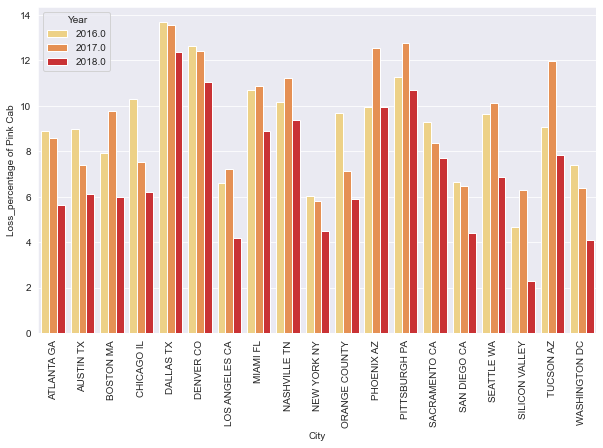

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='loss_percentage',data=loss_dist_pink,hue='Year',palette='YlOrRd')
plt.ylabel("Loss_percentage of Pink Cab")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'ORANGE COUNTY'),
  Text(10, 0, 'PHOENIX AZ'),
  Text(11, 0, 'PITTSBURGH PA'),
  Text(12, 0, 'SACRAMENTO CA'),
  Text(13, 0, 'SAN DIEGO CA'),
  Text(14, 0, 'SEATTLE WA'),
  Text(15, 0, 'TUCSON AZ'),
  Text(16, 0, 'WASHINGTON DC')])

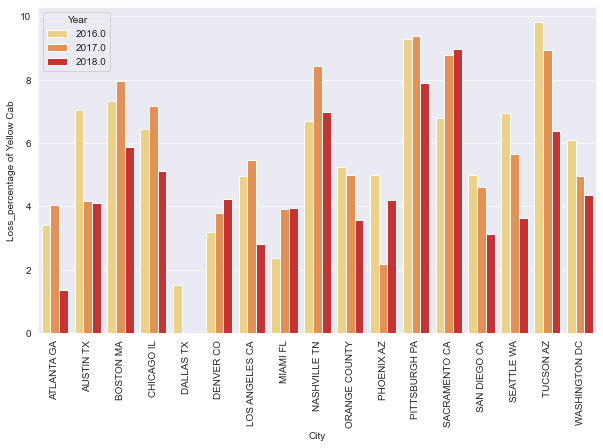

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(x='City',y='loss_percentage',data=loss_dist_yellow,hue='Year',palette='YlOrRd')
plt.ylabel("Loss_percentage of Yellow Cab")
plt.xticks(rotation=90)

### How companies are managing both, the avg.profit percentage and avg.loss percentage during each year

In [128]:
profit_loss_allyears = pd.merge(loss_dist, profit_dist, on=['Company','City','Year'])
profit_loss_allyears

,Company,City,Year,loss_percentage,profit_percentage
0,Pink Cab,ATLANTA GA,2016,-8.88,34.37
1,Pink Cab,ATLANTA GA,2017,-8.58,28.84
2,Pink Cab,ATLANTA GA,2018,-5.65,21.58
3,Pink Cab,AUSTIN TX,2016,-9.00,38.36
4,Pink Cab,AUSTIN TX,2017,-7.38,39.50
...,...,...,...,...,...
101,Yellow Cab,TUCSON AZ,2017,-8.94,33.68
102,Yellow Cab,TUCSON AZ,2018,-6.36,25.78
103,Yellow Cab,WASHINGTON DC,2016,-6.08,30.38
104,Yellow Cab,WASHINGTON DC,2017,-4.94,35.36


In [129]:
subplot_1 = profit_loss_allyears[profit_loss_allyears['Year']==2016]
subplot_1_grpby = subplot_1.groupby(['Company']).agg(avg_loss_percentage = pd.NamedAgg(column='loss_percentage',aggfunc='mean'), 
                                                      avg_profit_percentage = pd.NamedAgg(column='profit_percentage',aggfunc='mean')).reset_index()

subplot_2 = profit_loss_allyears[profit_loss_allyears['Year']==2017]
subplot_2_grpby = subplot_2.groupby(['Company']).agg(avg_loss_percentage = pd.NamedAgg(column='loss_percentage',aggfunc='mean'), 
                                                      avg_profit_percentage = pd.NamedAgg(column='profit_percentage',aggfunc='mean')).reset_index()

subplot_3 = profit_loss_allyears[profit_loss_allyears['Year']==2018]
subplot_3_grpby = subplot_3.groupby(['Company']).agg(avg_loss_percentage = pd.NamedAgg(column='loss_percentage',aggfunc='mean'), 
                                                      avg_profit_percentage = pd.NamedAgg(column='profit_percentage',aggfunc='mean')).reset_index()

In [130]:
subplot_3_grpby

,Company,avg_loss_percentage,avg_profit_percentage
0,Pink Cab,-7.05,24.62
1,Yellow Cab,-4.78,32.63


In [131]:
subplot_2_grpby

,Company,avg_loss_percentage,avg_profit_percentage
0,Pink Cab,-9.29,31.05
1,Yellow Cab,-5.90,40.73


In [132]:
subplot_1_grpby

,Company,avg_loss_percentage,avg_profit_percentage
0,Pink Cab,-9.14,31.66
1,Yellow Cab,-5.71,40.98


C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\snigdha.chigurup

Text(0, 0.5, 'Profit and loss percentage')

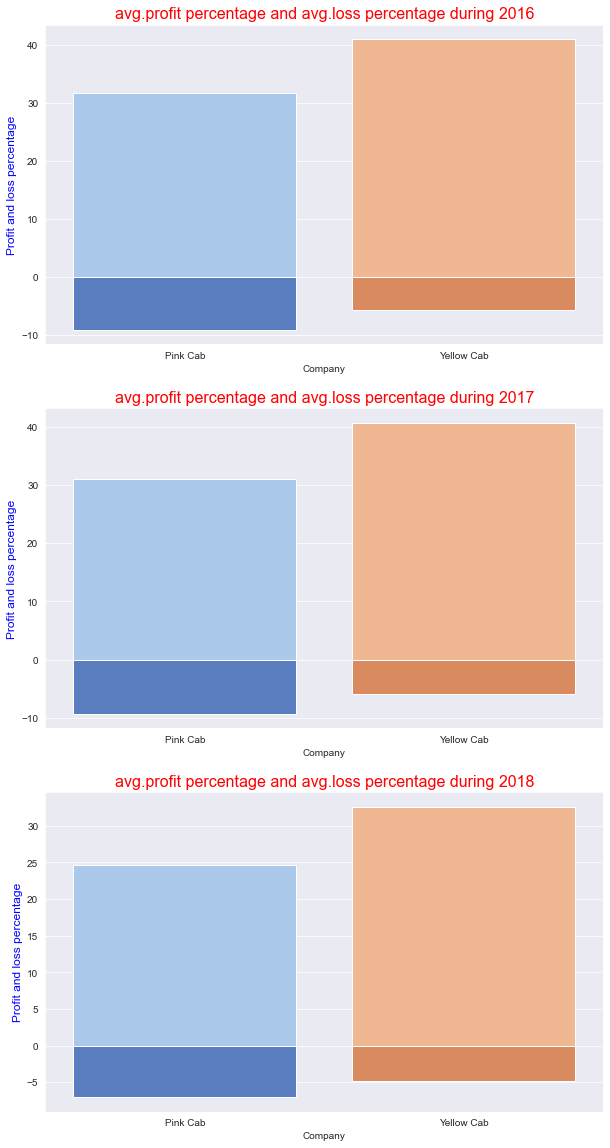

In [133]:
plt.figure(figsize=(10,20))
sns.set_style("darkgrid")

plt.subplot(3,1,1)
sns.barplot(subplot_1_grpby['Company'],subplot_1_grpby['avg_profit_percentage'],palette='pastel')
sns.barplot(x=subplot_1_grpby['Company'],y=subplot_1_grpby['avg_loss_percentage'],palette='muted')
plt.title("avg.profit percentage and avg.loss percentage during 2016",size=16,color='red')
plt.ylabel("Profit and loss percentage",size=12,color='blue')

plt.subplot(3,1,2)
sns.barplot(subplot_2_grpby['Company'],subplot_2_grpby['avg_profit_percentage'], palette='pastel')
sns.barplot(subplot_2_grpby['Company'],subplot_2_grpby['avg_loss_percentage'], palette='muted')
plt.title("avg.profit percentage and avg.loss percentage during 2017",size=16,color='red')
plt.ylabel("Profit and loss percentage",size=12,color='blue')

plt.subplot(3,1,3)
sns.barplot(subplot_3_grpby['Company'],subplot_3_grpby['avg_profit_percentage'], palette='pastel')
sns.barplot(subplot_3_grpby['Company'],subplot_3_grpby['avg_loss_percentage'], palette='muted')
plt.title("avg.profit percentage and avg.loss percentage during 2018",size=16,color='red')
plt.ylabel("Profit and loss percentage",size=12,color='blue')

### Total transactions/rides of each company for all years

In [134]:
df_cab_trans = pd.merge(cab_data_df,transactionID_df,on='Transaction ID')
df_cab_trans_cus = pd.merge(df_cab_trans,customerID_df,on='Customer ID')
df_cab_trans_cus

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,28.24,28712,Cash,Male,53,11242
1,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.21,2016,42.51,28712,Card,Male,53,11242
2,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.66,2017,48.23,28712,Card,Male,53,11242
3,10320493,2018-04-21,Yellow Cab,ATLANTA GA,19.38,326.35,272.10,2018,19.94,28712,Cash,Male,53,11242
4,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,2016,43.33,58925,Card,Male,38,26550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.79,2018,-0.75,45644,Card,Male,28,23014
359388,10439393,2018-12-31,Yellow Cab,ORANGE COUNTY,24.78,379.42,347.91,2018,9.06,15270,Cash,Female,18,19636
359389,10439410,2018-12-31,Yellow Cab,PITTSBURGH PA,4.04,81.05,52.84,2018,53.38,50921,Card,Male,33,18698
359390,10439419,2018-12-31,Yellow Cab,SACRAMENTO CA,32.67,469.42,466.53,2018,0.62,46512,Cash,Male,20,16996


In [135]:
df_cab_trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year                359392 non-null  int64         
 8   profit_percentage   359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [136]:
pd.options.display.float_format = '{:.2f}'.format

In [137]:
df_grp = df_cab_trans_cus.groupby(['Company','Year']).agg(
    no_of_transactions_rides = pd.NamedAgg(column="Transaction ID", aggfunc="count"),
    no_of_unique_customers = pd.NamedAgg(column="Customer ID", aggfunc="nunique"),
    revenue=(pd.NamedAgg(column="Price Charged", aggfunc="sum")))
df_grp

no_of_transactions_rides  no_of_unique_customers     revenue
Company    Year                                                              
Pink Cab   2016                     25080                   16661  7908479.23
           2017                     30321                   18643  9578629.54
           2018                     29310                   18400  8841142.56
Yellow Cab 2016                     82239                   25937 38481133.18
           2017                     98189                   27789 45818910.04
           2018                     94253                   27470 41553843.97

In [138]:
df_grp_new = df_grp.reset_index()

In [139]:
trans_rides_allyears = py.line(x='Year',y='no_of_transactions_rides',data_frame=df_grp_new, color="Company")
trans_rides_allyears.show()

### City wise transactions/rides of each company

In [140]:
df_grp_1 = df_cab_trans_cus.groupby(['City','Company']).count()['Transaction ID'].reset_index()
df_grp_1.rename(columns={"Transaction ID":"no_of_transactions_OR_rides"}, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

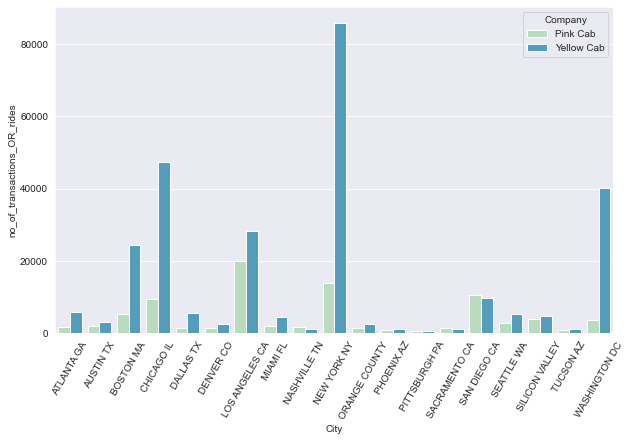

In [141]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'City', y='no_of_transactions_OR_rides', data =df_grp_1, hue ='Company', palette='GnBu')
plt.xticks(rotation=60)

### The percentage of people who preferred each company out of the total users across all cities

In [142]:
df_joined = df_grp_1.merge(city_df, on ='City')
df_joined.head()

,City,Company,no_of_transactions_OR_rides,Population,Users
0,ATLANTA GA,Pink Cab,1762,814885,24701
1,ATLANTA GA,Yellow Cab,5795,814885,24701
2,AUSTIN TX,Pink Cab,1868,698371,14978
3,AUSTIN TX,Yellow Cab,3028,698371,14978
4,BOSTON MA,Pink Cab,5186,248968,80021


In [143]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   City                         38 non-null     object
 1   Company                      38 non-null     object
 2   no_of_transactions_OR_rides  38 non-null     int64 
 3   Population                   38 non-null     int32 
 4   Users                        38 non-null     int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.5+ KB


In [144]:
df_joined['percentage_transactions_outof_TotalUsers'] = (df_joined['no_of_transactions_OR_rides']/df_joined['Users'])*100
df_joined.head()

,City,Company,no_of_transactions_OR_rides,Population,Users,percentage_transactions_outof_TotalUsers
0,ATLANTA GA,Pink Cab,1762,814885,24701,7.13
1,ATLANTA GA,Yellow Cab,5795,814885,24701,23.46
2,AUSTIN TX,Pink Cab,1868,698371,14978,12.47
3,AUSTIN TX,Yellow Cab,3028,698371,14978,20.22
4,BOSTON MA,Pink Cab,5186,248968,80021,6.48


In [145]:
plt.figure(figsize=(10,6))
py.scatter(data_frame=df_joined,x='City', y='percentage_transactions_outof_TotalUsers', color='Company')

<Figure size 720x432 with 0 Axes>

### Out of the most common customers of each company, how is the age, gender and income distributed 

In [146]:
df_cab_trans_cus.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,28.24,28712,Cash,Male,53,11242
1,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.21,2016,42.51,28712,Card,Male,53,11242
2,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.66,2017,48.23,28712,Card,Male,53,11242
3,10320493,2018-04-21,Yellow Cab,ATLANTA GA,19.38,326.35,272.10,2018,19.94,28712,Cash,Male,53,11242
4,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,2016,43.33,58925,Card,Male,38,26550


In [147]:
pinkcab_cust = df_cab_trans_cus[df_cab_trans_cus['Company']=='Pink Cab']
yellowcab_cust = df_cab_trans_cus[df_cab_trans_cus['Company']=='Yellow Cab']

In [148]:
pink_top100_cust = pinkcab_cust['Customer ID'].value_counts().sort_values(ascending=False).head(100).reset_index()
pink_top100_cust.columns = ['Customer ID','no_of_rides']
pink_top100_cust

,Customer ID,no_of_rides
0,8120,18
1,8595,17
2,7927,17
3,6159,17
4,7340,16
...,...,...
95,6341,12
96,7227,12
97,7353,12
98,6796,12


In [149]:
pink_top100_cust_demo = pd.merge(pink_top100_cust, customerID_df, on='Customer ID')
pink_top100_cust_demo

,Customer ID,no_of_rides,Gender,Age,Income (USD/Month)
0,8120,18,Female,59,16965
1,8595,17,Male,43,23719
2,7927,17,Male,62,14300
3,6159,17,Male,34,8668
4,7340,16,Male,26,18178
...,...,...,...,...,...
95,6341,12,Female,57,21127
96,7227,12,Male,38,14001
97,7353,12,Male,39,10111
98,6796,12,Male,20,11516


In [171]:
pink_top100_cust_demo['Gender'].value_counts()

Male      59
Female    41
Name: Gender, dtype: int64

In [172]:
print(pink_top100_cust_demo['Income (USD/Month)'].min())
print(pink_top100_cust_demo['Income (USD/Month)'].max())

2333
34984


In [150]:
plt.figure(figsize=(15,6))
py.bar(x='Age', y = 'Income (USD/Month)', data_frame=pink_top100_cust_demo, color='Gender')

<Figure size 1080x432 with 0 Axes>

In [151]:
yellow_top100_cust = yellowcab_cust['Customer ID'].value_counts().sort_values(ascending=False).head(100).reset_index()
yellow_top100_cust.columns = ['Customer ID','no_of_rides']
yellow_top100_cust

,Customer ID,no_of_rides
0,494,47
1,1803,47
2,1360,47
3,636,46
4,126,45
...,...,...
95,2131,38
96,444,38
97,1305,38
98,1766,38


In [152]:
yellow_top100_cust_demo = pd.merge(yellow_top100_cust, customerID_df, on='Customer ID')
yellow_top100_cust_demo

,Customer ID,no_of_rides,Gender,Age,Income (USD/Month)
0,494,47,Male,18,18616
1,1803,47,Male,38,19204
2,1360,47,Male,36,12457
3,636,46,Male,52,9797
4,126,45,Female,18,10637
...,...,...,...,...,...
95,2131,38,Male,31,5383
96,444,38,Female,57,22015
97,1305,38,Male,27,2750
98,1766,38,Male,35,24334


In [170]:
yellow_top100_cust_demo['Gender'].value_counts()

Male      50
Female    50
Name: Gender, dtype: int64

In [173]:
print(yellow_top100_cust_demo['Income (USD/Month)'].min())
print(yellow_top100_cust_demo['Income (USD/Month)'].max())

2340
34953


In [153]:
plt.figure(figsize=(15,6))
py.bar(x='Age', y = 'Income (USD/Month)', data_frame=yellow_top100_cust_demo, color='Gender')

<Figure size 1080x432 with 0 Axes>

 ### Forecasting

In [154]:
df_cab_trans_cus_city = pd.merge(df_cab_trans_cus, city_df, on='City')

In [155]:
from statsmodels.tsa.arima_model import ARIMA

In [156]:
df_cab_trans_cus_city_timeseries = df_cab_trans_cus_city.set_index('Date of Travel')
df_cab_trans_cus_city_timeseries.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Date of Travel,,,,,,,,,,,,,,,
2016-01-02,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,28.24,28712,Cash,Male,53,11242,814885,24701
2016-09-21,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.21,2016,42.51,28712,Card,Male,53,11242,814885,24701
2017-06-23,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.66,2017,48.23,28712,Card,Male,53,11242,814885,24701
2018-04-21,10320493,Yellow Cab,ATLANTA GA,19.38,326.35,272.10,2018,19.94,28712,Cash,Male,53,11242,814885,24701
2016-01-02,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.16,2016,188.94,27602,Card,Male,23,8542,814885,24701


In [157]:
df_cab_trans_cus_city_timeseries_pink = df_cab_trans_cus_city_timeseries[df_cab_trans_cus_city_timeseries['Company']=='Pink Cab']
df_cab_trans_cus_city_timeseries_yellow = df_cab_trans_cus_city_timeseries[df_cab_trans_cus_city_timeseries['Company']=='Yellow Cab']

##### Checking forecasting for Pink Cab

In [158]:
df_cab_trans_cus_city_timeseries_pink_sampled = df_cab_trans_cus_city_timeseries_pink.resample('D').sum()
df_cab_trans_cus_city_timeseries_pink_sampled

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Age,Income (USD/Month),Population,Users
Date of Travel,,,,,,,,,,,
2016-01-02,410006914,814.49,13858.58,9049.16,82656,2008.01,885222,1424,643606,61020526,3995164
2016-01-03,520009002,1342.21,25375.33,14754.75,104832,3700.91,904435,1929,805411,84984926,5608169
2016-01-04,40000544,79.30,1266.07,837.48,8064,210.15,19979,144,69897,20001748,892562
2016-01-05,60001126,158.18,2505.80,1760.44,12096,256.66,154531,276,52321,6069632,558898
2016-01-06,230002765,509.02,7957.59,5620.61,46368,894.39,495651,809,374489,46007714,2590359
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,688606436,1461.68,20457.74,16158.61,133188,1904.61,1374303,2363,930570,165771968,8417115
2018-12-28,2264058503,4836.04,71309.55,52830.65,437906,7617.45,3494245,7699,3171673,505636902,27753299
2018-12-29,2034530213,4431.16,68126.84,48726.84,393510,7741.92,3804073,6703,2786821,458309661,24359877


In [159]:
train = df_cab_trans_cus_city_timeseries_pink_sampled.iloc[:-219]
test = df_cab_trans_cus_city_timeseries_pink_sampled.iloc[-219:]

In [160]:
train

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Age,Income (USD/Month),Population,Users
Date of Travel,,,,,,,,,,,
2016-01-02,410006914,814.49,13858.58,9049.16,82656,2008.01,885222,1424,643606,61020526,3995164
2016-01-03,520009002,1342.21,25375.33,14754.75,104832,3700.91,904435,1929,805411,84984926,5608169
2016-01-04,40000544,79.30,1266.07,837.48,8064,210.15,19979,144,69897,20001748,892562
2016-01-05,60001126,158.18,2505.80,1760.44,12096,256.66,154531,276,52321,6069632,558898
2016-01-06,230002765,509.02,7957.59,5620.61,46368,894.39,495651,809,374489,46007714,2590359
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-22,289257900,697.34,8043.60,7791.14,56504,81.15,371350,1126,411033,60060340,3507416
2018-05-23,351264374,863.97,10251.78,9719.02,68612,202.74,552218,1221,569393,84200445,4264946
2018-05-24,506235207,1093.22,12625.96,11788.17,98882,308.48,965039,1682,787534,101422354,5961928


In [161]:
model = ARIMA(train['profit_percentage'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [162]:
predictions = model_fit.forecast(steps=219)[0]

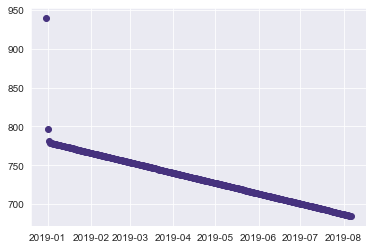

In [163]:
plt.scatter(pd.date_range(start=df_cab_trans_cus_city_timeseries_pink_sampled.index[-1], periods=len(predictions), freq='D'), predictions, label='Forecast')

##### Checking the forecast for yellow cab

In [164]:
df_cab_trans_cus_city_timeseries_yellow_sampled = df_cab_trans_cus_city_timeseries_yellow.resample('D').sum()
df_cab_trans_cus_city_timeseries_yellow_sampled

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,profit_percentage,Customer ID,Age,Income (USD/Month),Population,Users
Date of Travel,,,,,,,,,,,
2016-01-02,1400118937,3279.47,88457.39,43161.75,282240,14591.49,2773489,4912,1906751,400242866.00,21797293.00
2016-01-03,1260102481,2827.62,75971.25,37521.72,254016,12818.29,2564476,4356,1782987,352432541.00,19041244.00
2016-01-04,210015405,449.17,9786.67,6136.47,42336,1431.27,262344,710,315462,51771998.00,3130955.00
2016-01-05,410037510,1084.65,25697.12,14359.00,82656,3313.59,694794,1406,581408,148149625.00,7237034.00
2016-01-06,860069754,1926.41,43698.99,25035.54,173376,6483.63,1825843,3014,1338179,209960419.00,12760531.00
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,2629685821,5636.39,102244.77,74187.12,508536,9532.26,5017901,8589,3821394,842236409.00,41154339.00
2018-12-28,6532468606,13745.95,281617.70,181206.28,1263268,33941.31,10062974,21089,9672885,2404755228.00,109822493.00
2018-12-29,6574237801,14402.06,289551.59,190737.51,1271340,33396.90,10738877,22848,9664008,2414906176.00,110888890.00


In [165]:
train = df_cab_trans_cus_city_timeseries_yellow_sampled.iloc[:-219]
test = df_cab_trans_cus_city_timeseries_yellow_sampled.iloc[-219:]

In [166]:
model = ARIMA(train['profit_percentage'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [167]:
predictions = model_fit.forecast(steps=219)[0]

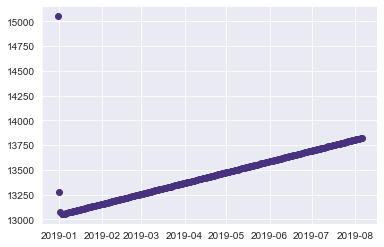

In [168]:
plt.scatter(pd.date_range(start=df_cab_trans_cus_city_timeseries_yellow_sampled.index[-1], periods=len(predictions), freq='D'), predictions, label='Forecast')

### Infereneces of hypothesis

1. The revenue generated by companies were high in 2017 when compared to 2016 and 2018. The revenue and the average profit percentage of the 'Yellow Cab' was much higher than the 'Pink Cab', infact, the average profit percentage of Yellow Cab was more than 50% during few years.
2. The kilometers travelled by either companies is not affecting the profit percentage meaning, shorter and longer rides in terms of kilometers does not affect the profit percentage of the companies.
3. Interstingly, San Fransisco does have the cab service users but there is no cab data related to San Fransisco, it may be because people of San Fransisco might have other cab company preferences.
4. Yellow cab had been more predominantly popular in Newyork city than pink cab, followed by Chicago, Boton, Washington DC, Los Angeles. 
5. Almost both the companies had seen much profit in Newyork city, Silicion Valley. Other profitable cities for pink cab company include Miami, Austin, Tuscon. For Yellow cab it is, Dallas.
6. The cities which brought loss over pink cab were, Dallas, Denver, Pheonix, Pittsburgh, Tuscon. For yellow cab, the cities were, Pittsburgh, Sacramento, Tuscon.
7. Overall, the loss percentage for pink cab each year is more than yellow cab.
8. The total kilometers travelled and the customer base are more for Yellow cab. Also, Newyork city had acclaimed the highest cab services by making highest kilometers travelled.
9. People in most of the cities preferred yellow cab over pink cab company.
10. For pink cab company, most customers were around the age 18-27 with others extending to 45 and 65. However, for Yellow cab company, prominent age gropus were from 18 till 40 with others extending to 45, 50 and even 65, and both companies have customers whose income ranges from around 2k till 35k USD/Month
11. Lastly, through timeseries forcasting using ARIMA, it was seen that the forecasted profit percentange for 2019, increased for yellow cab whereas it decreased for pink cab company.
12. From above all, it can be suggested that investing in Yellow would be right for the XYZ firm. 